# 🎓 Student Exam Score Predictor
This program predicts student exam scores based on behavioral and lifestyle data using a regression model. The dataset was provided by Kaggle (https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data)

Step 1: Import the libraries that allow the program to function correctly

In [4]:
# 📦 Import Libraries
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import numpy as np
sns.set_theme(style='whitegrid')

Step 2: Load the data from the CSV file and prepare it for manipulation by the program

In [5]:
# 📁 Load and Prepare Data
df = pd.read_csv("student_habits_performance.csv")
df = df.drop(columns=['student_id'])  # Drop ID column

Step 3: Define the target column (exam scores), drop the ID column, and separate the categorical columns from the numeric ones

In [6]:
# 🎯 Define Features and Target
target_column = 'exam_score'
x = df.drop(columns=[target_column])
y = df[target_column]

# Define categorical columns to be specially handled by CatBoost
categorical_columns = [
    'gender', 'part_time_job', 'diet_quality',
    'parental_education_level', 'internet_quality',
    'extracurricular_participation'
]

# Fill NaNs in categorical columns
x[categorical_columns] = x[categorical_columns].fillna('N/A')

Step 4: Split the "training" data from the "testing" data and train the regression model

In [7]:
# 🧠 Train-Test Split & Train CatBoost Model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features=categorical_columns,
    verbose=False,
)

model.fit(x_train, y_train)

Step 5: Display data representing the accuracy of the model's predictions

In [8]:
# 📊 Evaluate the Model's Accuracy
y_pred = model.predict(x_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(comparison_df)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

     Actual  Predicted
521    64.2  66.473083
737    72.7  78.605711
740    79.0  79.402390
660    79.5  73.251103
411    58.2  60.288687
..      ...        ...
408    34.3  32.927733
332    71.2  70.800714
208    75.8  76.131760
613    85.7  92.824676
78     77.3  81.955019

[200 rows x 2 columns]

Mean Squared Error: 26.24
R² Score: 0.90


Step 6: Display a pie chart demonstrating the relative importance of the top 7 behavioral features

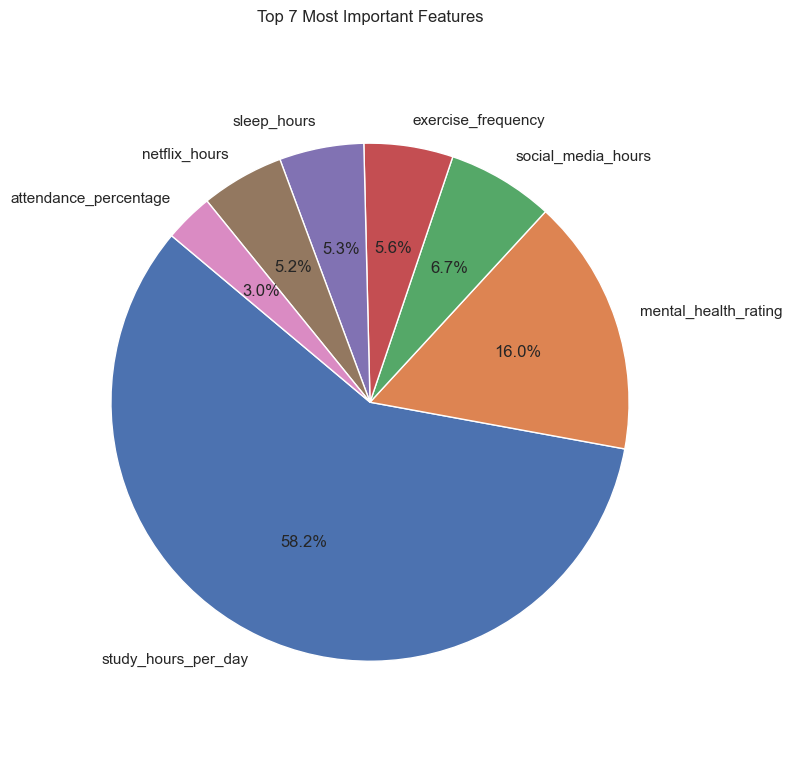

In [9]:
# 🥧 Feature Importance - Pie Chart (Top 7)
feature_importance = model.get_feature_importance()
feature_names = x.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)

top_n = 7
top_features = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

plt.figure(figsize=(8, 8))
plt.pie(
    top_features['Importance'],
    labels=top_features['Feature'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=False
)
plt.title(f'Top {top_n} Most Important Features')
plt.axis('equal')
plt.tight_layout()
plt.show()

Step 7: Display a scatter plot that shows the relationship between exam scores and number of study hours (the most important feature), complete with a trend line

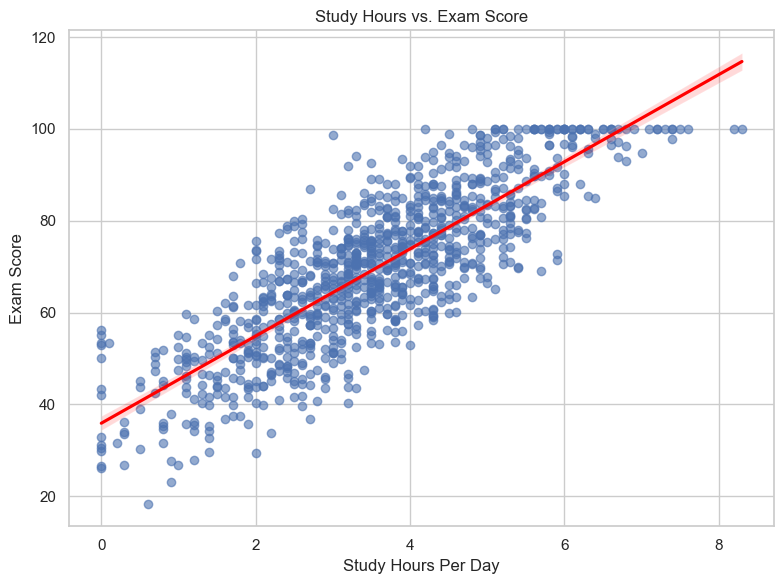

In [10]:
# 📉 Study Hours vs Exam Score Scatter Plot with Trend Line
plt.figure(figsize=(8, 6))
sns.regplot(x='study_hours_per_day', y='exam_score', data=df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Study Hours vs. Exam Score')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Step 8: Display a residual distribution plot for charting the level of error in the predictions

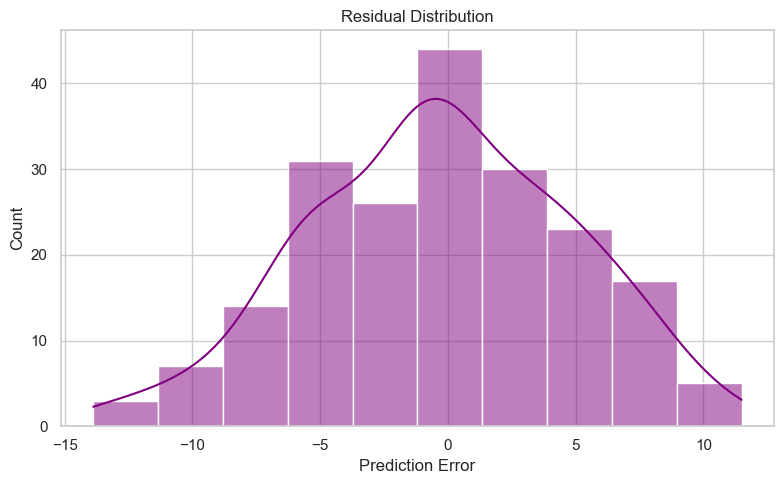

In [11]:
# 🔍 Residual Plot for Prediction Error
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Prediction Error')
plt.grid(True)
plt.tight_layout()
plt.show()

Step 9: Allow the user to insert their own student data in

In [12]:
# 💡 UI Function for Making Predictions
def predict_ui(age, gender, study_hours_per_day, social_media_hours, netflix_hours,
               part_time_job, attendance_percentage, sleep_hours, diet_quality,
               exercise_frequency, parental_education_level, internet_quality,
               mental_health_rating, extracurricular_participation):

    # Save Input Data
    input_dict = {
        'age': age,
        'gender': gender,
        'study_hours_per_day': study_hours_per_day,
        'social_media_hours': social_media_hours,
        'netflix_hours': netflix_hours,
        'part_time_job': part_time_job,
        'attendance_percentage': attendance_percentage,
        'sleep_hours': sleep_hours,
        'diet_quality': diet_quality,
        'exercise_frequency': exercise_frequency,
        'parental_education_level': parental_education_level,
        'internet_quality': internet_quality,
        'mental_health_rating': mental_health_rating,
        'extracurricular_participation': extracurricular_participation
    }

    # Use Input Data to Make an Exam Score Prediction
    df_input = pd.DataFrame([input_dict])
    df_input[categorical_columns] = df_input[categorical_columns].fillna('N/A')
    try:
        prediction = model.predict(df_input)[0]
        prediction = np.clip(prediction, 0.0, 100.0)    # Ensure exam scores are within the valid range
        print(f"Predicted Exam Score: {prediction:.2f}")
    except Exception as e:
        print(f'Error: {e}')

# Declare Limits for Input Data
interact_manual(
    predict_ui,
    age=(18, 30),
    gender=['Male', 'Female'],
    study_hours_per_day=(0.0, 10.0),
    social_media_hours=(0.0, 5.0),
    netflix_hours=(0.0, 5.0),
    part_time_job=['Yes', 'No'],
    attendance_percentage=(0.0, 100.0),
    sleep_hours=(0.0, 10.0),
    diet_quality=['Poor', 'Fair', 'Good'],
    exercise_frequency=(0, 7),
    parental_education_level=['High School', 'Bachelor', 'Master'],
    internet_quality=['Poor', 'Average', 'Good'],
    mental_health_rating=(1, 10),
    extracurricular_participation=['Yes', 'No']
)

interactive(children=(IntSlider(value=24, description='age', max=30, min=18), Dropdown(description='gender', o…

<function __main__.predict_ui(age, gender, study_hours_per_day, social_media_hours, netflix_hours, part_time_job, attendance_percentage, sleep_hours, diet_quality, exercise_frequency, parental_education_level, internet_quality, mental_health_rating, extracurricular_participation)>